# **PHY442 ORIGIN OF THE CHEMICAL ELEMENTS**

**GALACTIC CHEMICAL EVOLUTION ASSIGNMENT**



**Specify the location and Load the given dataset**





In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the url path to the data file in GitHub
github_paper_url = "https://raw.githubusercontent.com/meghadas123/Origin-of-Chemical-Elements/main/adibekyandata.csv"

**To reproduce the plot on differential metallicity distribution function (MDF) of the closed box model**

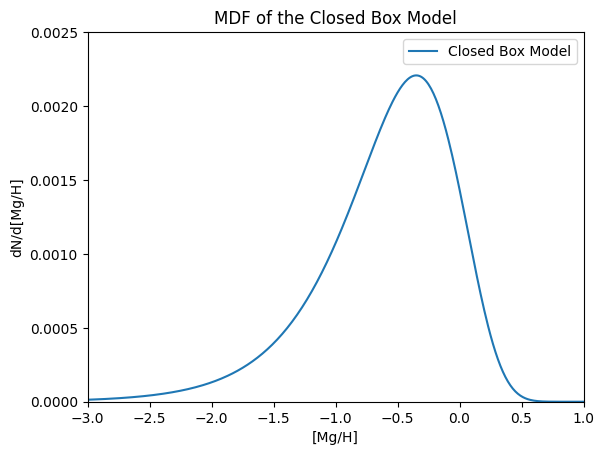

In [2]:
import numpy as np

# Constants
Z_sun = 0.0134
p = 0.006

# Function to calculate metallicity Z
def calculate_Z(Mg_H):
    return 10**(Mg_H) * Z_sun

# Function to calculate dN/d[Mg/H]
def calculate_dN_dMg_H(Z):
   return Z * np.exp(-Z/p)

Mg_H_values = np.arange(-3.0, 1.01, 0.01)

# Calculate Z values
Z_values = calculate_Z(Mg_H_values)

# Calculate dN/d[M/H] values
dN_dMg_H_values = calculate_dN_dMg_H(Z_values)

# Plot the curve
plt.plot(Mg_H_values, dN_dMg_H_values, label='Closed Box Model')

# Plot the graph of observed data
plt.ylim(0, 0.0025)
plt.xlim(-3.0, 1.0)
plt.xlabel('[Mg/H]')
plt.ylabel('dN/d[Mg/H]')
plt.title('MDF of the Closed Box Model')
plt.legend()
plt.show()

**From the above graph (blue curve) we can say that the stars have a broad metallicity distribution in the closed box model, with a peak at [M/H] ≈ -0.368 and a significant number of stars in the tail towards low metallicities**

**Also to check the validity of the closed box model, we need to compare the theoretical MDF with an observed MDF, and the data is collected from Adibekyan et al. (2012, A&A, 545, A32)**

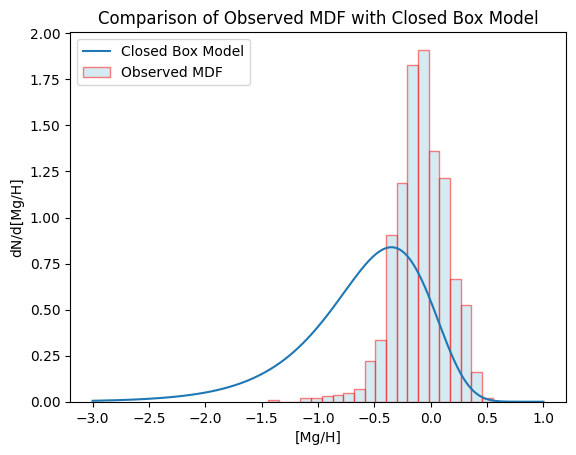

In [3]:
# Constants
Z_sun = 0.0134
p = 0.006
a = 380 # scaling parameter

# Read the file into a pandas DataFrame
data = pd.read_csv(github_paper_url)

# Function to calculate metallicity Z
def calculate_Z(Mg_H):
    return 10**Mg_H * Z_sun

# Function to calculate dN/d[Mg/H]
def calculate_dN_dMg_H(Z):
    return Z * a * np.exp(-Z/p)

# Initialize lists to store [Mg/H] values and dN/d[Mg/H] values
Mg_H_values = np.arange(-3.0, 1.01, 0.01)
dN_dMg_H_values = []

# Loop over [Mg/H] values
for Mg_H in Mg_H_values:
    # Calculate Z from [Mg/H]
    Z = calculate_Z(Mg_H)

    # Calculate dN/d[M/H]
    dN_dMg_H = calculate_dN_dMg_H(Z)

    # Append the calculated dN/d[M/H] value to the list
    dN_dMg_H_values.append(dN_dMg_H)

# Plot the differential MDF
plt.plot(Mg_H_values, dN_dMg_H_values, label='Closed Box Model')

# Extract relevant data column (assuming the tenth column is [Mg/H] values)
Mg_H_values = data.iloc[:, 9]

# Plot the histogram of observed data
plt.hist(Mg_H_values, bins=21, density=True, alpha=0.5, edgecolor='red', color='lightblue', label='Observed MDF')

plt.xlabel('[Mg/H]')
plt.ylabel('dN/d[Mg/H]')
plt.title('Comparison of Observed MDF with Closed Box Model')
plt.legend()
plt.show()

**To solve the G dwarf problem, we can assume that the ISM has an initial abundance greater than the primordial value of Z=0, i.e. that the ISM
was pre-enriched to some metallicity Z0**

**Setting Z0 = Z⊙/10, and using the same values as before for 𝑍⨀ = 0.0134 and p = 0.006, we can get the cumulative MDF plotted together with the original Z0 = 0 model and the metallicity data of Adibekyan et al. (2012)**

**This is done in three steps:**

**1. Plotted for z0=0 and Z0 = Z⊙/10**

**2. Plotted the metallicity data of Adibekyan et al. (2012)**

**3. Plotted the 3 curves together**

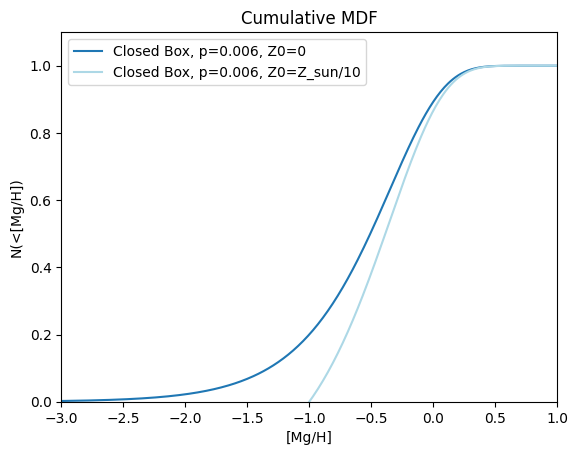

In [4]:
# Function to calculate metallicity Z
def calculate_Z(Mg_H):
    return 10**(Mg_H) * Z_sun

# Define the cumulative MDF equation
def cumulative_MDF(params, Zt):
    Z0, p = params
    return M0 * (1 - np.exp((Z0 - Zt) / p))

# Initial values for parameters Z0 and p
params = [0.0, 0.006]
M0 = 1  # Total gas mass
Z_sun = 0.0134  # Solar metallicity value

Mg_H_values = np.arange(-3.0, 1.01, 0.01)

# Calculate Z values for both cases
Z_values = calculate_Z(Mg_H_values)

# Calculate N(<d[Mg/H]) values for both the above cases
N_Mg_H_values = cumulative_MDF(params, Z_values)
N_Mg_H_values_low = cumulative_MDF([Z_sun/10, 0.006], Z_values)

# Plot the curve
plt.plot(Mg_H_values, N_Mg_H_values, label='Closed Box, p=0.006, Z0=0')
plt.plot(Mg_H_values, N_Mg_H_values_low, label='Closed Box, p=0.006, Z0=Z_sun/10', color='lightblue')
plt.ylim(0, 1.1)
plt.xlim(-3.0, 1.0)
plt.xlabel('[Mg/H]')
plt.ylabel('N(<[Mg/H])')
plt.title('Cumulative MDF')
plt.legend(loc='upper left')  # Positioning the legend on the lower left
plt.show()

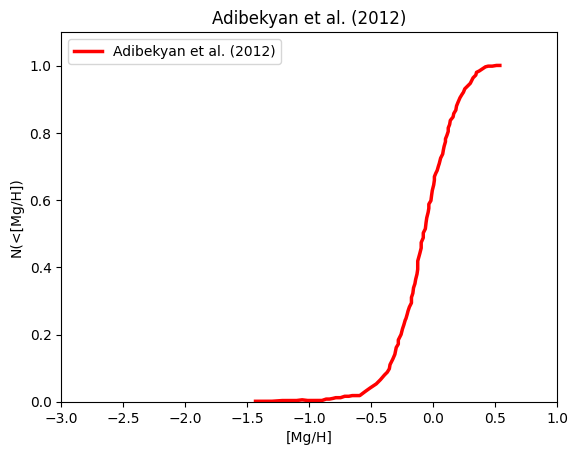

In [5]:
#Link to the data from GitHub
github_url = "https://raw.githubusercontent.com/meghadas123/Origin-of-Chemical-Elements/main/Adibekyan%20et%20al.csv"
data2 = pd.read_csv(github_url)  # Replace 'your_data_file.csv' with your file path

# Extract the values from relevant columns
Mg_H_values_red = data2.iloc[:, 0]
N_Mg_H_values_red = data2.iloc[:, 1]

# Plot the data
plt.plot(Mg_H_values_red, N_Mg_H_values_red, label='Adibekyan et al. (2012)', color='red', linewidth=2.5)

# Labeling the axes
plt.ylim(0, 1.1)
plt.xlim(-3.0, 1.0)
plt.xlabel('[Mg/H]')
plt.ylabel('N(<[Mg/H])')
plt.title('Adibekyan et al. (2012)')
plt.legend(loc='upper left')  # Positioning the legend on the lower left
plt.show()

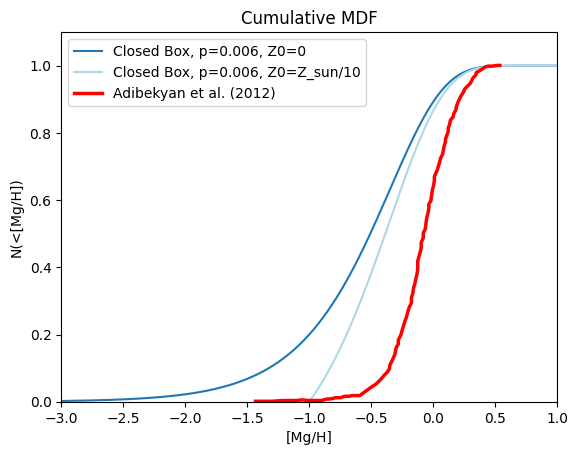

In [6]:
# Finally, plot all the curves together
plt.plot(Mg_H_values, N_Mg_H_values, label='Closed Box, p=0.006, Z0=0')
plt.plot(Mg_H_values, N_Mg_H_values_low, label='Closed Box, p=0.006, Z0=Z_sun/10', color='lightblue')
plt.plot(Mg_H_values_red, N_Mg_H_values_red, label='Adibekyan et al. (2012)', color='red', linewidth=2.5)

# Plot
plt.ylim(0, 1.1)
plt.xlim(-3.0, 1.0)
plt.xlabel('[Mg/H]')
plt.ylabel('N(<[Mg/H])')
plt.title('Cumulative MDF')
plt.legend(loc='upper left')  # Positioning the legend on the lower left
plt.show()

**Next, find the model parameters, p and Z0, that best match the observed data and then plot all the curves together**

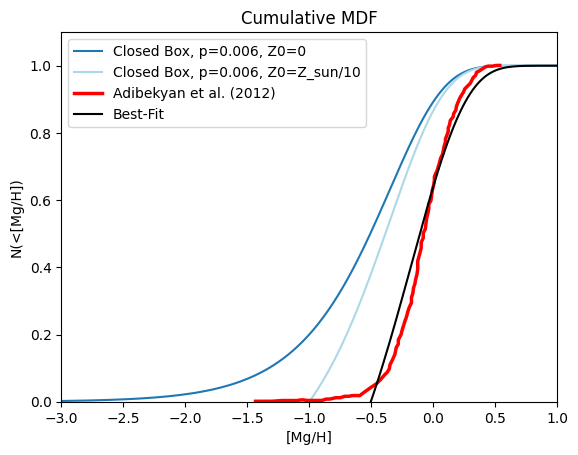

In [7]:
# Function to calculate metallicity Z
def calculate_Z(Mg_H):
    return 10**(Mg_H) * Z_sun

# Define the cumulative MDF equation
def cumulative_MDF(params, Zt):
    Z0, p = params
    return M0 * (1 - np.exp((Z0 - Zt) / p))

# Initial values for parameters Z0 and p
params_black = [0.00420, 0.009]
M0 = 1  # Total gas mass
Z_sun = 0.0134  # Solar metallicity value

Mg_H_values = np.arange(-3.0, 1.01, 0.01)

# Calculate Z values for both cases and paper data (red curve)
Z_values = calculate_Z(Mg_H_values)

# Calculate N(<d[Mg/H]) values for both the above cases
N_Mg_H_values_black_curve = cumulative_MDF(params_black, Z_values)

# Plot the curve
plt.plot(Mg_H_values, N_Mg_H_values, label='Closed Box, p=0.006, Z0=0')
plt.plot(Mg_H_values, N_Mg_H_values_low, label='Closed Box, p=0.006, Z0=Z_sun/10', color='lightblue')
plt.plot(Mg_H_values_red, N_Mg_H_values_red, label='Adibekyan et al. (2012)', color='red', linewidth=2.5)
plt.plot(Mg_H_values, N_Mg_H_values_black_curve, label='Best-Fit', color='black')

# Plot
plt.ylim(0, 1.1)
plt.xlim(-3.0, 1.0)
plt.xlabel('[Mg/H]')
plt.ylabel('N(<[Mg/H])')
plt.title('Cumulative MDF')
plt.legend(loc='upper left')  # Positioning the legend on the lower left
plt.show()

**To print the values for the model parameters, p and Z0, that best match the observed data**

In [8]:
print(f"Z0, p = {params_black}")


Z0, p = [0.0042, 0.009]


**Finally, using the model parameters, need to determine what the predicted present-day ISM metallicity would be**

In [9]:
# Define the cumulative MDF equation for the best-fit curve
def cumulative_MDF_best_fit(Zt):
    Z0, p = params_black
    return M0 * (1 - np.exp((Z0 - Zt) / p))

# Calculate the predicted present-day ISM metallicity
predicted_metallicity = cumulative_MDF_best_fit(0)

print("Predicted present-day ISM metallicity:", predicted_metallicity)

Predicted present-day ISM metallicity: -0.5946697582283156
